In [1]:
import cv2
import numpy as np
import imageio
import matplotlib.pyplot as plt
from config import load_config
paths = load_config(dataset_key='all')

Paths are for dataset tagged: all


C:\AIND\output_data\BigTiffs2024-11-11T10_38_55.7322368-08_00\side_camera_right.csv


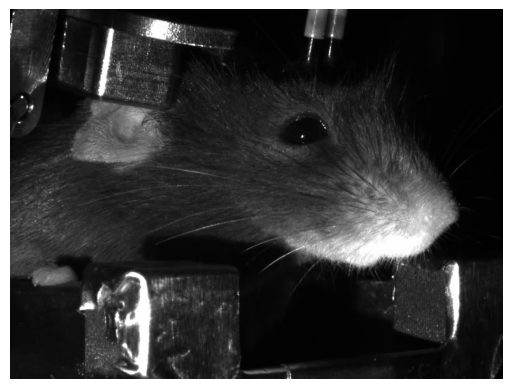

In [ ]:
# Load csv of timestamps

# Load behavior timestamps
behavior_time_path = str(paths['raw_data'] / 'side_camera_right.csv')
timestamps = np.genfromtxt(behavior_time_path, delimiter=',', dtype=None, encoding=None)
behavior_time = timestamps['f0']
print(behavior_time_path)

# Open and check the first frame
video_path = str(paths['raw_data'] / 'side_camera_right.avi')
reader = imageio.get_reader(video_path, 'ffmpeg')

# Read the first frame
first_frame = reader.get_data(0)

# Display the first frame using matplotlib
plt.imshow(first_frame, vmin=0, vmax=100)
plt.axis('off')
plt.show()

# Close the video reader
reader.close()


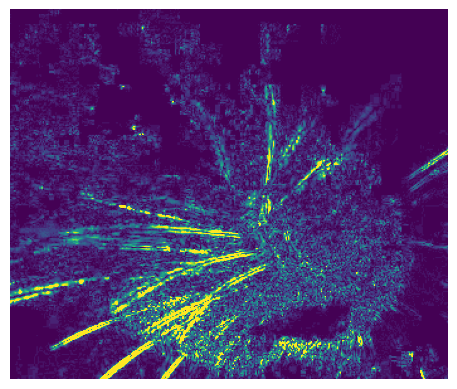

In [57]:
# Plot diff

plt.imshow(store[1985], vmin=0, vmax=20)
plt.axis('off')
plt.show()


In [ ]:
# Select the snout ROI, convert to grayscale, and compute the absolute difference between frames

# Step 1: Open the video file
#video_path = 'C:\AIND\output_data\\750101_2024-11-07_videos\\bottom_camera_new.mp4'

reader = imageio.get_reader(video_path, 'ffmpeg')

# Step 2: Read the first frame
try:
    frame = reader.get_data(0)
except IndexError:
    print("Error: Could not read frame.")
    reader.close()
    exit()

# Convert the frame from RGB (imageio) to BGR (OpenCV)
frame_bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

# Step 3: Display the first frame and let the user select the ROI
roi = cv2.selectROI("Select Snout ROI", frame_bgr, fromCenter=False, showCrosshair=True)
cv2.destroyWindow("Select Snout ROI")

# Extract the ROI coordinates
x, y, w, h = map(int, roi)
print(f"Selected ROI - x: {x}, y: {y}, width: {w}, height: {h}")

# Step 4: Initialize variables for frame differencing
motion_levels = []

# Convert the initial ROI to grayscale
prev_frame = frame[y:y+h, x:x+w]
prev_gray = cv2.cvtColor(prev_frame, cv2.COLOR_RGB2GRAY)

store = []
# Step 5: Loop through the rest of the frames
frame_count = 1  # We have already read the first frame
for i, frame in enumerate(reader):

    # Print the frame number every 1000 frames
    if i % 1000 == 0:
        print(f"Processing frame {i}...")

    if i == 0:
        continue  # Skip the first frame since we've already processed it
    if i >= 5000:  # Only use the first 1000 frames
        break

    # Extract the current ROI and convert to grayscale
    curr_frame = frame[y:y+h, x:x+w]
    curr_gray = cv2.cvtColor(curr_frame, cv2.COLOR_RGB2GRAY)

    # Compute the absolute difference between the current frame and the previous frame
    diff = cv2.absdiff(curr_gray, prev_gray)
    store.append(diff)

    # Threshold the difference image to obtain the motion regions
    threshold_value = 25  # You can adjust this value based on your video
    max_value = 255
    _, thresh = cv2.threshold(diff, threshold_value, max_value, cv2.THRESH_BINARY)

    # Quantify the motion by summing the pixel values
    motion_level = np.sum(thresh) / 255  # Divide by 255 to count the number of white pixels
    # motion_level = np.sum(diff)
    motion_levels.append(motion_level)

    # Update the previous frame
    prev_gray = curr_gray.copy()

    frame_count += 1

    # Optional: Display the current ROI and the thresholded difference
    # curr_frame_bgr = cv2.cvtColor(curr_frame, cv2.COLOR_RGB2BGR)
    # cv2.imshow("Current ROI", curr_frame_bgr)
    # cv2.imshow("Motion", thresh)
    # if cv2.waitKey(1) & 0xFF == ord('q'):
    #     break

# Release the video reader
reader.close()
cv2.destroyAllWindows()

# Step 6: Visualize the motion levels over time
time = behavior_time
plt.figure(figsize=(12, 4))
plt.plot(time-time[0], motion_levels)
plt.xlabel('Frame')
plt.ylabel('Motion Level (Number of Changed Pixels)')
plt.title('Motion Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Save the motion levels to a CSV file

output_path = str(paths['raw_data'] / 'whisker_motion.csv')
np.savetxt(output_path, motion_levels, delimiter=',', fmt='%d')
print(f"Motion levels saved to {output_path}")


Motion levels saved to C:\AIND\output_data\BigTiffs2024-11-11T10_38_55.7322368-08_00\whisker_motion.csv


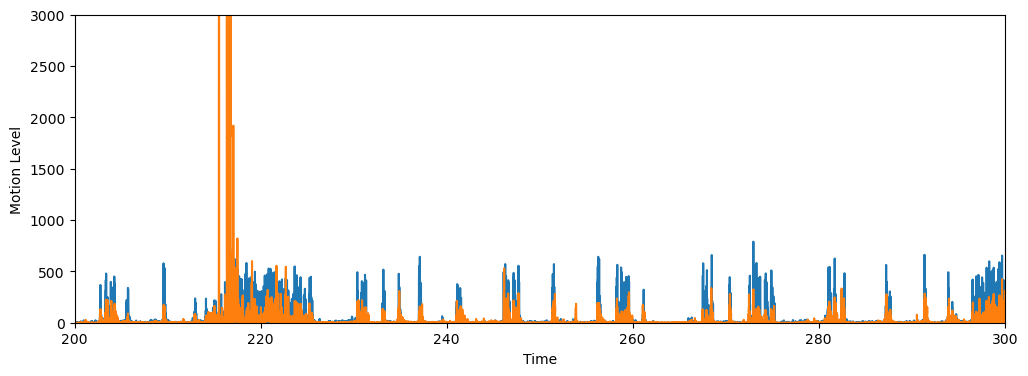

In [7]:
# Plot the motion levels over time
snout_path = [paths['raw_data'] / 'snout_motion.csv']
snout_motion = np.genfromtxt(snout_path[0], delimiter=',', dtype=None, encoding=None)
whisker_path = [paths['raw_data'] / 'whisker_motion.csv']
whisker_motion = np.genfromtxt(whisker_path[0], delimiter=',', dtype=None, encoding=None)

time = behavior_time
plt.figure(figsize=(12, 4))
plt.plot((time-time[0]), whisker_motion, label='Whisker Motion')
plt.plot((time-time[0]), snout_motion, label='Snout Motion')
plt.xlabel('Time')
plt.ylabel('Motion Level')
plt.xlim(200,300)
plt.ylim(0,3000)
plt.show()

In [ ]:
%matplotlib widget

import imageio
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import Button, HBox, VBox, IntText
from IPython.display import display

# # Step 1: Open the video and select the ROI
# video_path = 'C:\AIND\output_data\\750101_2024-11-07_videos\\bottom_camera_new.mp4'

# # Read the first frame using imageio
# reader = imageio.get_reader(video_path, 'ffmpeg')
# try:
#     frame = reader.get_data(0)
# except IndexError:
#     print("Error: Could not read frame.")
#     reader.close()
#     exit()

# # Convert the frame from RGB (imageio) to BGR (OpenCV)
# frame_bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

# # Display the first frame and let the user select the ROI
# roi = cv2.selectROI("Select Snout ROI", frame_bgr, fromCenter=False, showCrosshair=True)
# cv2.destroyWindow("Select Snout ROI")

# # Extract the ROI coordinates
# x, y, w, h = map(int, roi)
# print(f"Selected ROI - x: {x}, y: {y}, width: {w}, height: {h}")

# # Close the reader to reset it
# reader.close()

# # Step 2: Compute motion levels for each frame
# reader = imageio.get_reader(video_path, 'ffmpeg')
# num_frames = reader.count_frames()

# # Initialize variables
# motion_levels = []
# prev_gray = None

# for i, frame in enumerate(reader):
#     if i >= 5000:  # Only use the first 1000 frames
#         break

#     # Extract the current ROI and convert to grayscale
#     curr_frame = frame[y:y+h, x:x+w]
#     curr_gray = cv2.cvtColor(curr_frame, cv2.COLOR_RGB2GRAY)

#     if prev_gray is None:
#         # First frame, initialize prev_gray
#         motion_levels.append(0)
#     else:
#         # Compute the absolute difference between the current frame and the previous frame
#         diff = cv2.absdiff(curr_gray, prev_gray)

#         # Threshold the difference image to obtain the motion regions
#         threshold_value = 25  # Adjust this value if needed
#         _, thresh = cv2.threshold(diff, threshold_value, 255, cv2.THRESH_BINARY)

#         # Quantify the motion by summing the pixel values
#         motion_level = np.sum(thresh) / 255  # Number of white pixels
#         motion_levels.append(motion_level)

#     # Update the previous frame
#     prev_gray = curr_gray.copy()

# reader.close()

# Step 3: Set up the interactive visualization
# Initialize the figure and axes
fig, (ax_frame, ax_motion) = plt.subplots(1, 2, figsize=(10, 5))
plt.tight_layout()

# Plot the motion levels over frames on the right subplot
ax_motion.plot(motion_levels, label='Motion Level')
highlight, = ax_motion.plot([0], [motion_levels[0]], 'ro', label='Current Frame')
ax_motion.set_xlabel("Frame")
ax_motion.set_ylabel("Motion Level (Number of Changed Pixels)")
ax_motion.set_title("Snout Motion Over Time")
ax_motion.legend()

# Initialize the frame index
frame_index = 0

# Function to update the display
def update_display(change=None):
    global frame_index

    # Ensure frame_index is within valid range
    frame_index = max(0, min(frame_index, len(motion_levels) - 1))
    frame_text.value = frame_index  # Update the frame index display

    # Read the frame at frame_index
    reader = imageio.get_reader(video_path, 'ffmpeg')
    frame = reader.get_data(frame_index)
    reader.close()

    # Extract the ROI and convert to BGR for displaying
    curr_frame = frame[y:y+h, x:x+w]
    curr_frame_bgr = cv2.cvtColor(curr_frame, cv2.COLOR_RGB2BGR)

    # Update the frame display
    ax_frame.clear()
    ax_frame.imshow(cv2.cvtColor(curr_frame_bgr, cv2.COLOR_BGR2RGB))
    ax_frame.set_title(f"Frame {frame_index}")
    ax_frame.axis('off')

    # Update the highlight on the motion plot
    highlight.set_data([frame_index], [motion_levels[frame_index]])

    # Redraw the figure
    fig.canvas.draw_idle()

# Create 'Previous' and 'Next' buttons and an input box for frame index
button_prev = Button(description='Previous')
button_next = Button(description='Next')
frame_text = IntText(value=frame_index, description='Frame Index', min=0, max=len(motion_levels) - 1)

def on_prev_clicked(b):
    global frame_index
    if frame_index > 0:
        frame_index -= 1
        update_display()

def on_next_clicked(b):
    global frame_index
    if frame_index < len(motion_levels) - 1:
        frame_index += 1
        update_display()

def on_frame_text_changed(change):
    global frame_index
    frame_index = change['new']
    update_display()

button_prev.on_click(on_prev_clicked)
button_next.on_click(on_next_clicked)
frame_text.observe(on_frame_text_changed, names='value')

controls = HBox([button_prev, button_next, frame_text])
display(controls)

# Initial display
update_display()

In [ ]:
# Load and crop video to desired ROI and save new video

# Load the video using imageio
video_path = 'C:\AIND\output_data\\750101_2024-11-07_videos\\bottom_camera.avi'
output_path = 'C:\AIND\output_data\\750101_2024-11-07_videos\\cropped_video_bottom.avi'

# Open the video and get frame dimensions and fps
reader = imageio.get_reader(video_path, 'ffmpeg')
meta_data = reader.get_meta_data()
fps = meta_data['fps']
original_width = meta_data['size'][0]
original_height = meta_data['size'][1]

# Extract the first frame to use for ROI selection
first_frame = reader.get_data(0)

# Display the first frame and select the ROI
first_frame_bgr = cv2.cvtColor(first_frame, cv2.COLOR_RGB2BGR)  # Convert to BGR for OpenCV
roi = cv2.selectROI("Select ROI", first_frame_bgr, fromCenter=False, showCrosshair=True)
cv2.destroyWindow("Select ROI")

# Get ROI coordinates
x, y, width, height = roi
print(f"Selected ROI - X: {x}, Y: {y}, Width: {width}, Height: {height}")

# Set up the output writer with the new cropped dimensions
fourcc = cv2.VideoWriter_fourcc(*'MJPG')  # Choose codec (e.g., 'XVID' for .avi)
writer = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Process only the first 10 frames, crop each, and write to the output video
for frame in reader:

    # Convert the frame to BGR format for OpenCV compatibility
    frame_bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)

    # Crop the frame to the selected ROI
    cropped_frame = frame_bgr[y:y+height, x:x+width]

    # Write the cropped frame to the output file
    writer.write(cropped_frame)

# Release the video writer and close the imageio reader
writer.release()
reader.close()

print("Cropped video test saved as", output_path)

In [ ]:
# Check first frame of cropped video

video_path = 'C:\AIND\output_data\\750101_2024-11-07_videos\\cropped_video_bottom.avi'
reader = imageio.get_reader(video_path, 'ffmpeg')

# Read the first frame
first_frame = reader.get_data(0)

# Display the first frame using matplotlib
plt.imshow(first_frame)
plt.axis('off')
plt.show()

# Close the video reader
reader.close()

In [ ]:
# Load the video and draw ellipses for eye and bright spot regions

# Load the video
video_path = 'C:\AIND\output_data\750101_2024-11-07_videos\cropped_video.avi'
reader = imageio.get_reader(video_path, 'ffmpeg')

# Step 1: Calculate an average of the first 1000 frames to create a stable baseline
frame_count = 0
sum_frames = None
for i, frame in enumerate(reader):
    if i >= 1000:  # Only use the first 1000 frames
        break
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    if sum_frames is None:
        sum_frames = np.float32(frame_gray)
    else:
        sum_frames += frame_gray
    frame_count += 1

# Calculate the average of the first 1000 frames
average_frame = (sum_frames / frame_count).astype(np.uint8)
reader.close()

# Global variables for ellipse drawing
drawing = False
ellipse_params = {"center": None, "axes": None}
ellipse_eye = {"center": None, "axes": None}
ellipse_brightspot = {"center": None, "axes": None}

# Mouse callback function to draw ellipse
def draw_ellipse(event, x, y, flags, param):
    global drawing, ellipse_params
    
    if event == cv2.EVENT_LBUTTONDOWN:
        # Start drawing the ellipse
        ellipse_params["center"] = (x, y)
        drawing = True
    
    elif event == cv2.EVENT_MOUSEMOVE and drawing:
        # Update the axes lengths as the mouse moves
        axes_length = (abs(x - ellipse_params["center"][0]), abs(y - ellipse_params["center"][1]))
        temp_frame = average_frame.copy()
        cv2.ellipse(temp_frame, ellipse_params["center"], axes_length, 0, 0, 360, 255, 2)
        cv2.imshow("Draw Ellipse", temp_frame)
    
    elif event == cv2.EVENT_LBUTTONUP:
        # Finalize the ellipse dimensions
        ellipse_params["axes"] = (abs(x - ellipse_params["center"][0]), abs(y - ellipse_params["center"][1]))
        drawing = False
        temp_frame = average_frame.copy()
        cv2.ellipse(temp_frame, ellipse_params["center"], ellipse_params["axes"], 0, 0, 360, 255, 2)
        cv2.imshow("Draw Ellipse", temp_frame)

# Step 2: Draw the first ellipse for the eye region
cv2.imshow("Draw Ellipse", average_frame)
cv2.setMouseCallback("Draw Ellipse", draw_ellipse)
print("Draw the ellipse around the eye region, then press Enter.")

# Wait until Enter is pressed
cv2.waitKey(0)
cv2.destroyAllWindows()

# Store the first ellipse parameters (eye region)
ellipse_eye["center"] = ellipse_params["center"]
ellipse_eye["axes"] = ellipse_params["axes"]

# Step 3: Draw the second ellipse for the bright spot region
print("Now, draw the ellipse around the bright spot region, then press Enter.")
cv2.imshow("Draw Ellipse", average_frame)
cv2.setMouseCallback("Draw Ellipse", draw_ellipse)

# Wait until Enter is pressed
cv2.waitKey(0)
cv2.destroyAllWindows()

# Store the second ellipse parameters (bright spot region)
ellipse_brightspot["center"] = ellipse_params["center"]
ellipse_brightspot["axes"] = ellipse_params["axes"]

# Step 4: Create masks for the eye region and bright spot region
frame_height, frame_width = average_frame.shape
eye_mask = np.zeros((frame_height, frame_width), dtype=np.uint8)
brightspot_mask = np.zeros((frame_height, frame_width), dtype=np.uint8)

# Draw the ellipses on the respective masks
cv2.ellipse(eye_mask, ellipse_eye["center"], ellipse_eye["axes"], 0, 0, 360, 255, -1)  # Full ellipse for the eye
cv2.ellipse(brightspot_mask, ellipse_brightspot["center"], ellipse_brightspot["axes"], 0, 0, 360, 255, -1)  # Full ellipse for the bright spot

# Combine the eye mask with the inverted bright spot mask to exclude the bright spot
combined_mask = cv2.bitwise_and(eye_mask, cv2.bitwise_not(brightspot_mask))

# Display the combined mask for verification
cv2.imshow("Combined Mask", combined_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()

print("Eye mask and bright spot mask created successfully.")

In [ ]:
# Calculate the average intensity within the eye region (excluding the bright spot)

# Load the video
video_path = 'C:\AIND\output_data\750101_2024-11-07_videos\cropped_video.avi'
reader = imageio.get_reader(video_path, 'ffmpeg')

# Use the combined mask created from user input
# Assuming ellipse_eye and ellipse_brightspot were defined as per the previous steps
frame_height, frame_width = average_frame.shape  # From the averaged frame in previous code
eye_mask = np.zeros((frame_height, frame_width), dtype=np.uint8)
brightspot_mask = np.zeros((frame_height, frame_width), dtype=np.uint8)

# Draw the ellipses on the respective masks
cv2.ellipse(eye_mask, ellipse_eye["center"], ellipse_eye["axes"], 0, 0, 360, 255, -1)  # Eye region ellipse
cv2.ellipse(brightspot_mask, ellipse_brightspot["center"], ellipse_brightspot["axes"], 0, 0, 360, 255, -1)  # Bright spot ellipse

# Combine the eye mask with the inverted bright spot mask to exclude the bright spot
combined_mask = cv2.bitwise_and(eye_mask, cv2.bitwise_not(brightspot_mask))

# Calculate the average intensity within the eye region (excluding the bright spot) for the first 10,000 frames
average_intensities = []
for i, frame in enumerate(reader):
    if i >= 50000:  # Limit to the first 10,000 frames
        break

    # Convert the frame to grayscale for intensity calculation
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

    # Calculate the mean intensity in the masked elliptical region
    mean_intensity = cv2.mean(frame_gray, mask=combined_mask)[0]
    average_intensities.append(mean_intensity)

# Release the video reader
reader.close()

# Plot the intensity values over time
plt.figure(figsize=(14, 5))
plt.plot(average_intensities)
plt.xlabel("Frame")
plt.ylabel("Average Intensity in Elliptical ROI (Excluding Bright Spot)")
plt.show()


In [ ]:
# Create an interactive visualization of the video with intensity trend

%matplotlib widget

import imageio
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import Button, HBox, VBox, IntText
from IPython.display import display

video_path = 'C:\AIND\output_data\cropped_video.avi'
num_frames = 10000  # Number of frames to process

# Create the combined mask
reader = imageio.get_reader(video_path, 'ffmpeg')
first_frame = reader.get_data(0)
frame_height, frame_width = first_frame.shape[:2]
eye_mask = np.zeros((frame_height, frame_width), dtype=np.uint8)
brightspot_mask = np.zeros((frame_height, frame_width), dtype=np.uint8)

cv2.ellipse(eye_mask, ellipse_eye["center"], ellipse_eye["axes"], 0, 0, 360, 255, -1)
cv2.ellipse(brightspot_mask, ellipse_brightspot["center"], ellipse_brightspot["axes"], 0, 0, 360, 255, -1)
combined_mask = cv2.bitwise_and(eye_mask, cv2.bitwise_not(brightspot_mask))
reader.close()

# Precompute the average intensities
average_intensities = []
reader = imageio.get_reader(video_path, 'ffmpeg')

for i, frame in enumerate(reader):
    if i >= num_frames:
        break
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
    mean_intensity = cv2.mean(frame_gray, mask=combined_mask)[0]
    average_intensities.append(mean_intensity)
reader.close()

# Initialize the figure and axes
fig, (ax_frame, ax_intensity) = plt.subplots(1, 2, figsize=(10, 5))
plt.tight_layout()

# Plot the intensity trend over frames on the right subplot
ax_intensity.plot(average_intensities, label='Average Intensity')
highlight, = ax_intensity.plot([0], [average_intensities[0]], 'ro', label='Current Frame')
ax_intensity.set_xlabel("Frame")
ax_intensity.set_ylabel("Average Intensity in Elliptical ROI")
ax_intensity.set_title(f"Intensity Over First {num_frames} Frames")
ax_intensity.legend()

# Initialize the frame index
frame_index = 0

def update_display(change=None):
    global frame_index

    # Ensure frame_index is within valid range
    frame_index = max(0, min(frame_index, num_frames - 1))
    frame_text.value = frame_index  # Update the frame index display

    # Read the frame at frame_index
    reader = imageio.get_reader(video_path, 'ffmpeg')
    frame = reader.get_data(frame_index)
    reader.close()

    # Convert to grayscale
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

    # Apply CLAHE to enhance contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    frame_gray_enhanced = clahe.apply(frame_gray)

    # Overlay the bright spot mask
    brightspot_mask_inv = cv2.bitwise_not(brightspot_mask)
    frame_gray_masked = cv2.bitwise_and(frame_gray_enhanced, frame_gray_enhanced, mask=brightspot_mask_inv)
    frame_gray_masked[brightspot_mask == 255] = 0  # Set bright spot area to black

    # Convert back to BGR for displaying and drawing
    frame_display = cv2.cvtColor(frame_gray_masked, cv2.COLOR_GRAY2BGR)

    # Draw the eye ellipse on the frame
    cv2.ellipse(frame_display, ellipse_eye["center"], ellipse_eye["axes"], 0, 0, 360, (0, 255, 0), 2)

    # Convert the frame to RGB for matplotlib
    frame_rgb = cv2.cvtColor(frame_display, cv2.COLOR_BGR2RGB)

    # Update the frame display
    ax_frame.clear()
    ax_frame.imshow(frame_rgb)
    ax_frame.set_title(f"Frame {frame_index + 1}")
    ax_frame.axis('off')

    # Update the highlight on the intensity plot
    highlight.set_data([frame_index], [average_intensities[frame_index]])

    # Redraw the figure
    fig.canvas.draw_idle()

# Create 'Previous' and 'Next' buttons and an input box for frame index
button_prev = Button(description='Previous')
button_next = Button(description='Next')
frame_text = IntText(value=frame_index, description='Frame Index', min=0, max=num_frames - 1)

def on_prev_clicked(b):
    global frame_index
    if frame_index > 0:
        frame_index -= 1
        update_display()

def on_next_clicked(b):
    global frame_index
    if frame_index < num_frames - 1:
        frame_index += 1
        update_display()

def on_frame_text_changed(change):
    global frame_index
    frame_index = change['new']
    update_display()

button_prev.on_click(on_prev_clicked)
button_next.on_click(on_next_clicked)
frame_text.observe(on_frame_text_changed, names='value')

controls = HBox([button_prev, button_next, frame_text])
display(controls)

# Initial display
update_display()